In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
import cvxpy as cp

from decentr_geom_median import *
import ciropt as co

In [2]:
# random seed
np.random.seed(108)

# data generation
problem_spec = {}
problem_spec['n_node'] = 6
problem_spec['vector_size'] = 10
print(problem_spec)
problem_data = data_generation(problem_spec)
network_data = graph_generation_nodes6()

problem_data['rho'] = 0.01

problem_spec['sc_eps'] = 1

# PG-EXTRA hyperparameters
problem_data['alpha'] = 2.5
problem_data['itr_num'] = 1000

{'n_node': 6, 'vector_size': 10}


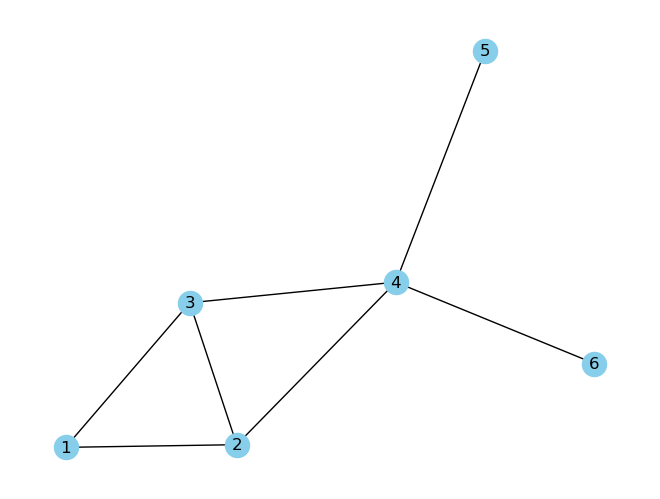

In [3]:
nx.draw(network_data["G"], node_color='skyblue', with_labels=True)
# plt.savefig("plots/graph_n6.pdf")

In [4]:
f_star, x_opt_star = cvx_geom_median(problem_spec, problem_data)
print(f"{f_star=}, {np.linalg.norm(x_opt_star)=}")

f_star=1064.175460673057, np.linalg.norm(x_opt_star)=2.1267484654113913


In [5]:
b = problem_data['b']
 
vector_size = problem_spec['vector_size']
n_node = problem_spec['n_node']
eps = problem_spec['sc_eps']
prox_operators = []
fi_operators = []

for jj in range(n_node):
    bj = b[jj*vector_size : (jj+1)*vector_size]
    if jj in [3, 4]:
        prox_operators += [lambda z, alpha, bj=bj:  cvx_prox_fj_geom_mean_sc(z, alpha, bj, vector_size, eps=eps)]
        fi_operators += [lambda x_kj, bj=bj: np.linalg.norm((x_kj - bj), ord=2) + eps*np.linalg.norm(x_kj, ord=2)**2]
    else:
        prox_operators += [lambda z, alpha, bj=bj:  prox_fj_geom_mean(z, alpha, bj)]
        fi_operators += [lambda x_kj, bj=bj: np.linalg.norm((x_kj - bj), ord=2)]

    z = np.random.randn(vector_size)
    x1 = prox_fj_geom_mean(z, 1, bj)
    x2 = cvx_prox_fj_geom_mean(z, 1, bj, vector_size)
    assert np.linalg.norm(x1 - x2) / np.linalg.norm(x1) < 1e-5

In [6]:
params={"R":18, "Inductance":10, "Capacitance":1, "h":1.0541046971920436}
dadmm_c_err_opt_star, dadmm_c_err_opt_reldiff, dadmm_c_const_vio, dadmm_c_f_reldiff = co.dadmm("cir_dadmm_c", problem_spec, problem_data, 
                                                                                network_data, x_opt_star, f_star, prox_operators=prox_operators,
                                                                                fi_operators=fi_operators,
                                                                                params=params, printing=True, freq=200)

ii=0, f_reldiff[-1]=0.03569153894389762, err_opt_reldiff[-1]=9.774994369534085
ii=200, f_reldiff[-1]=5.4920992030355997e-08, err_opt_reldiff[-1]=0.00015794841907417978
ii=400, f_reldiff[-1]=7.807720298056141e-10, err_opt_reldiff[-1]=0.00016485329277987585
ii=600, f_reldiff[-1]=4.416129340696561e-10, err_opt_reldiff[-1]=0.00016474544017402773
ii=800, f_reldiff[-1]=1.2234981420050403e-09, err_opt_reldiff[-1]=0.00016465009729878122
ii=999, f_reldiff[-1]=3.680021606976051e-10, err_opt_reldiff[-1]=0.0001649348619058171


In [6]:
params={"R":2, "Inductance":4, "Capacitance":4, "h":2.764408907848405}
dadmm_c_err_opt_star, dadmm_c_err_opt_reldiff, dadmm_c_const_vio, dadmm_c_f_reldiff = co.dadmm("cir_dadmm_c", problem_spec, problem_data, 
                                                                                network_data, x_opt_star, f_star, prox_operators=prox_operators,
                                                                                fi_operators=fi_operators,
                                                                                params=params, printing=True, freq=200)

ii=0, f_reldiff[-1]=0.0030498744654014016, err_opt_reldiff[-1]=1.0319408398375531
ii=200, f_reldiff[-1]=2.3673303344004704e-11, err_opt_reldiff[-1]=0.00014762567525910967
ii=400, f_reldiff[-1]=9.146649243248952e-12, err_opt_reldiff[-1]=0.0001476288064334907
ii=600, f_reldiff[-1]=5.1977726834413697e-11, err_opt_reldiff[-1]=0.00014760901384976293
ii=800, f_reldiff[-1]=2.6663286980857372e-11, err_opt_reldiff[-1]=0.00014762597303395592
ii=999, f_reldiff[-1]=9.616064281848731e-12, err_opt_reldiff[-1]=0.0001476335348215636


In [8]:
R = 10
admm_err_opt_star, admm_err_opt_reldiff, admm_const_vio, admm_f_reldiff = co.dadmm("dadmm", problem_spec, problem_data, 
                                                                                network_data, x_opt_star, f_star, prox_operators=prox_operators,
                                                                                fi_operators=fi_operators,
                                                                                params={"R":R}, printing=True, freq=200)

ii=0, f_reldiff[-1]=0.01939896320647022, err_opt_reldiff[-1]=5.241826403479447
ii=200, f_reldiff[-1]=1.63023868154696e-07, err_opt_reldiff[-1]=0.0001722726704032208
ii=400, f_reldiff[-1]=7.429876446185126e-12, err_opt_reldiff[-1]=0.0001589144221910161
ii=600, f_reldiff[-1]=7.32731876820247e-12, err_opt_reldiff[-1]=0.00015889847393759117
ii=800, f_reldiff[-1]=1.3823920344745432e-12, err_opt_reldiff[-1]=0.00015890202603109613
ii=999, f_reldiff[-1]=1.8621141197115793e-10, err_opt_reldiff[-1]=0.00015888427698610542


In [7]:
R = 2
admm_err_opt_star, admm_err_opt_reldiff, admm_const_vio, admm_f_reldiff = co.dadmm("dadmm", problem_spec, problem_data, 
                                                                                network_data, x_opt_star, f_star, prox_operators=prox_operators,
                                                                                fi_operators=fi_operators,
                                                                                params={"R":R}, printing=True, freq=200)

ii=0, f_reldiff[-1]=0.0030498744654014016, err_opt_reldiff[-1]=1.0319408398375531
ii=200, f_reldiff[-1]=2.0248517884871405e-11, err_opt_reldiff[-1]=0.00014762643572574047
ii=400, f_reldiff[-1]=2.803520958570452e-11, err_opt_reldiff[-1]=0.00014762593026747115
ii=600, f_reldiff[-1]=3.001820502186499e-11, err_opt_reldiff[-1]=0.0001476263021849886
ii=800, f_reldiff[-1]=4.32359667573671e-11, err_opt_reldiff[-1]=0.00014762701335624732
ii=999, f_reldiff[-1]=2.2684903722446864e-11, err_opt_reldiff[-1]=0.00014762539494239335


In [24]:
R = 1
admm_err_opt_star, admm_err_opt_reldiff, admm_const_vio, admm_f_reldiff = co.dadmm("dadmm", problem_spec, problem_data, 
                                                                                network_data, x_opt_star, f_star, prox_operators=prox_operators,
                                                                                fi_operators=fi_operators,
                                                                                params={"R":R}, printing=True, freq=200)

ii=0, f_reldiff[-1]=0.0009515448156513746, err_opt_reldiff[-1]=0.8337805286317195
ii=200, f_reldiff[-1]=2.4587775972683383e-11, err_opt_reldiff[-1]=4.773180818791781e-05
ii=400, f_reldiff[-1]=6.027438658901556e-10, err_opt_reldiff[-1]=4.7493252945880706e-05
ii=600, f_reldiff[-1]=4.100756148088559e-09, err_opt_reldiff[-1]=4.6114755350805225e-05
ii=800, f_reldiff[-1]=1.308742801973249e-10, err_opt_reldiff[-1]=4.7711777708327545e-05
ii=999, f_reldiff[-1]=1.6643615503781065e-11, err_opt_reldiff[-1]=4.7658136618236564e-05


In [ ]:
# params={"R":18, "Inductance":10, "h":1.1054814693822324}
# ciradmm_err_opt_star, ciradmm_err_opt_reldiff, ciradmm_const_vio, ciradmm_f_reldiff = co.dadmm("cir_dadmm", problem_spec, problem_data, 
#                                                                                 network_data, x_opt_star, f_star, prox_operators=prox_operators,
#                                                                                 fi_operators=fi_operators,
#                                                                                 params=params, printing=True, freq=200)

In [8]:
# apply P-EXTRA 
problem_data['alpha'] = 0.5
pg_op_norm, pg_err_opt_star, pg_err_opt_reldiff, pg_const_vio, pg_f_reldiff = p_extra_dgeom_median(None, problem_spec, problem_data, network_data, x_opt_star, f_star, printing=True, freq=200)

ii=0, f_reldiff[-1]=0.0008079289676965929, err_opt_reldiff[-1]=0.8024063457830873
ii=200, f_reldiff[-1]=3.492886321255733e-09, err_opt_reldiff[-1]=9.000532584395954e-05
ii=400, f_reldiff[-1]=2.1799061778871677e-11, err_opt_reldiff[-1]=8.842753078066836e-05
ii=600, f_reldiff[-1]=2.0830746369252105e-11, err_opt_reldiff[-1]=8.842803174157963e-05
ii=800, f_reldiff[-1]=2.0566019362959375e-11, err_opt_reldiff[-1]=8.842809725917978e-05
ii=999, f_reldiff[-1]=2.1204013584743143e-11, err_opt_reldiff[-1]=8.842764967190395e-05


In [20]:
# apply P-EXTRA 
problem_data['alpha'] = 1
pg_op_norm, pg_err_opt_star, pg_err_opt_reldiff, pg_const_vio, pg_f_reldiff = p_extra_dgeom_median(None, problem_spec, problem_data, network_data, x_opt_star, f_star, printing=True, freq=200)

ii=0, f_reldiff[-1]=0.0027526519095804145, err_opt_reldiff[-1]=0.8759282172595535
ii=200, f_reldiff[-1]=8.695931110330899e-09, err_opt_reldiff[-1]=0.00021631582702350474
ii=400, f_reldiff[-1]=1.2512378572810574e-10, err_opt_reldiff[-1]=0.00021473090602664151
ii=600, f_reldiff[-1]=1.483746796359194e-10, err_opt_reldiff[-1]=0.00021465865912219387
ii=800, f_reldiff[-1]=6.756243431302384e-11, err_opt_reldiff[-1]=0.00021469281669930763
ii=999, f_reldiff[-1]=7.369521252692333e-10, err_opt_reldiff[-1]=0.0002149402389600105


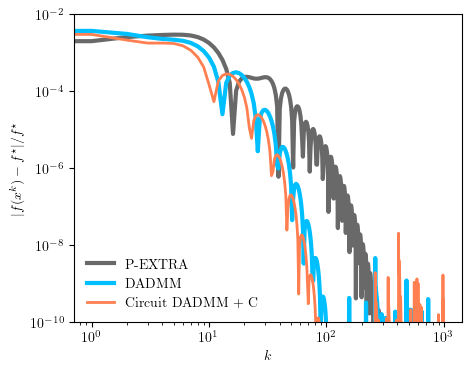

In [12]:
fname = "n6_circuit_dadmm_c"



plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["lines.markersize"] = 4
plt.rcParams["legend.framealpha"] = 0.0
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams["mathtext.fontset"] = 'cm' # default = 'dejavusans', other options = 'cm', 'stixsans', 'dejavuserif'
black, red, blue, green = 'dimgrey', 'coral', 'deepskyblue', 'gold'

# operator norm plot (log-log plot)
plt.figure(figsize=(5,4))
plt.minorticks_off()
plt.xscale("log")
plt.yscale("log")
plt.plot(pg_f_reldiff, label='P-EXTRA', color=black, linewidth=3)
plt.plot(admm_f_reldiff, label='DADMM', color=blue, linewidth=3)
# plt.plot(ciradmm_f_reldiff, label='Circuit DADMM',  color=green, linewidth=2)
plt.plot(dadmm_c_f_reldiff, label='Circuit DADMM + C',  color=red, linewidth=2)
plt.xlabel(r"$k$")
plt.ylabel(r"$|f(x^k) - f^\star|/f^\star$")
# plt.ylabel(r"$\|\tilde{\mathbf{A}}x_k\|^2_M$")
plt.ylim(1e-10, 1e-2)
plt.legend()
plt.savefig(f'plots/freldif_{fname}.pdf', dpi=300)

# plt.figure(figsize=(5,4))
# plt.minorticks_off()
# plt.xscale("log")
# plt.yscale("log")
# plt.plot(pg_err_opt_reldiff, label='P-EXTRA', color=black, linewidth=3)
# plt.plot(admm_err_opt_reldiff, label='DADMM', color=blue, linewidth=3)
# # plt.plot(admm_err_opt_reldiff, label='Circuit DADMM', color=green, linewidth=2)
# plt.plot(dadmm_c_err_opt_reldiff, label='Circuit DADMM + C', color=red, linewidth=2)
# plt.xlabel(r"$k$")
# plt.ylabel(r"$\|x_k - x^\star\|_F /\|x_0 - x^\star\|_F $")
# plt.ylim(1e-10, 1e0)
# plt.legend()
# plt.savefig(f'plots/xreldif_{fname}.pdf', dpi=300)